<a href="https://colab.research.google.com/github/Elcarrascou/Python_Data_Scientist/blob/main/TareaFinal_Met1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Paso a Python de la tarea final del ramo Metodos 1 del MEF**

Realice un análisis estadístico poblacional sobre el efecto del gasto en publicidad sobre las ventas utilizando los datos de la Tabla 1 (Ventas-Publicidad.xlsx), que muestra el nivel de ventas de una población de 90 empresas condicional al gasto en publicidad.


a.	Determine el valor esperado de las ventas y compare con el valor esperado de esta variable condicionada al gasto en publicidad.

# Carga y visualización de datos

1. **Montar el Google Drive para acceder al archivo**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. **Instalo la libreria necesaria para leer archivos excel**

In [ ]:
# openpyxl permite que pandas pueda leer correctamente archivos en ese formato
!pip install openpyxl

3. **Importar libreria necesaria**

In [ ]:
import pandas as pd  # Para manipulación de datos tipo DataFrame

4. **Definir la ruta al archivo Excel**

In [ ]:
path = '/content/drive/My Drive/R ALL MEF/Final metodos 1/Ventas-Publicidad.xlsx'

 5. **Cargar la hoja "Tabla_Mod_1" del archivo Excel**

In [ ]:
ventas_publicidad_mod1 = pd.read_excel(path, sheet_name='Tabla_Mod_1')

# Mostrar el contenido de la tabla 1
print("Tabla Mod 1:")
print(ventas_publicidad_mod1)

Tabla Mod 1:
   10 Mill  11 Mill  12 Mill  13 Mill  14 Mill  15 Mill  16 Mill  17 Mill  \
0    16000    18260    15000    15000    20000    20000    21912    35000   
1    32868    36520    40000    40000    50000    54780    60000    73040   
2    50000    54780    58000    60000    73040    80000    89000   100000   
3    50000    82170    90000    90000   100000   100500   120000   140000   
4   100000   109560   120000   120000   140000   160000   200000   230000   
5   180000   170000   182600   188973   219120   257880   300000   400000   
6   219120   273900   280000   328680   365200   400000   500000   600000   
7   300000   365200   380000   434120   500000   550000   650000   883085   
8   547800   730400   913000   821700  1064558  1460800  1500000  1826000   

   18 Mill  19 Mill  
0    40000    60000  
1    90000   120000  
2   105000   165784  
3   180000   250000  
4   280000   365200  
5   434686   600000  
6   730400  1095600  
7  1000000  1643400  
8  2487041  400000

6. **Cargar la hoja "Tabla_Mod_2" del mismo archivo**

In [ ]:
ventas_publicidad_mod2 = pd.read_excel(path, sheet_name='Tabla_Mod_2')
# Mostrar el contenido de la tabla 2
print("\nTabla Mod 2:")
print(ventas_publicidad_mod2)


Tabla Mod 2:
    Publicidad_Mill  Ventas_Mill
0                10        16000
1                10        32868
2                10        50000
3                10        50000
4                10       100000
..              ...          ...
85               19       365200
86               19       600000
87               19      1095600
88               19      1643400
89               19      4000000

[90 rows x 2 columns]


7. **Validar las clases (tipos de datos) de las columnas**

In [ ]:
print("\nTipos de datos en Mod 1:")
print(ventas_publicidad_mod1.dtypes)


Tipos de datos en Mod 1:
10 Mill    int64
11 Mill    int64
12 Mill    int64
13 Mill    int64
14 Mill    int64
15 Mill    int64
16 Mill    int64
17 Mill    int64
18 Mill    int64
19 Mill    int64
dtype: object


In [ ]:
print("\nTipos de datos en Mod 2:")
print(ventas_publicidad_mod2.dtypes)


Tipos de datos en Mod 2:
Publicidad_Mill    int64
Ventas_Mill        int64
dtype: object




---



# **Análisis de valores esperados y regresión lineal**

1. **Importamos paqueterias necesarias**

In [ ]:
import numpy as np # Importamos numpy para operaciones numéricas
import matplotlib.pyplot as plt # Importamos matplotlib para gráficos básicos
import seaborn as sns # Importamos seaborn para gráficos más estilizados

2. **Calcular medias (valor esperado)**

Imprime las medias de todas las columnas numéricas de la tabla Mod 1

In [ ]:
print("Medias por columna - Tabla Mod 1:")
print(ventas_publicidad_mod1.mean(numeric_only=True))

Medias por columna - Tabla Mod 1:
10 Mill    166198.666667
11 Mill    204532.222222
12 Mill    230955.555556
13 Mill    233163.666667
14 Mill    281324.222222
15 Mill    342662.222222
16 Mill    382323.555556
17 Mill    476347.222222
18 Mill    594125.222222
19 Mill    922220.444444
dtype: float64


Imprime las medias de todas las columnas numéricas de la tabla Mod 2

In [ ]:
print("\nMedias por columna - Tabla Mod 2:")
print(ventas_publicidad_mod2.mean(numeric_only=True))


Medias por columna - Tabla Mod 2:
Publicidad_Mill        14.5
Ventas_Mill        383385.3
dtype: float64


Calcula e imprime la media específica de la columna "10 Mill"

In [ ]:
media_10_mill = ventas_publicidad_mod1["10 Mill"].mean()
print(f"\nMedia para '10 Mill': {media_10_mill}")


Media para '10 Mill': 166198.66666666666


Calcula las medias de todas las columnas numéricas y las guarda en una variable

In [ ]:
medias = ventas_publicidad_mod1.mean(numeric_only=True)
print(medias)

10 Mill    166198.666667
11 Mill    204532.222222
12 Mill    230955.555556
13 Mill    233163.666667
14 Mill    281324.222222
15 Mill    342662.222222
16 Mill    382323.555556
17 Mill    476347.222222
18 Mill    594125.222222
19 Mill    922220.444444
dtype: float64


3. **Crear base con medias y clases**

Creamos un array de clases que representa distintos niveles de inversión

In [ ]:
clases = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

Creamos un nuevo DataFrame combinando las medias y las clases

In [ ]:
base_medias_mill = pd.DataFrame({
    'MEDIAS': medias.values,  # valores numéricos de las medias
    'CLASES': clases          # los valores de las clases que asignamos
})

Mostramos la tabla resultante

In [ ]:
print("\nBase de medias con clases:")
print(base_medias_mill)


Base de medias con clases:
          MEDIAS  CLASES
0  166198.666667      10
1  204532.222222      11
2  230955.555556      12
3  233163.666667      13
4  281324.222222      14
5  342662.222222      15
6  382323.555556      16
7  476347.222222      17
8  594125.222222      18
9  922220.444444      19


3. **Graficar la relación y la regresión**

Gráfico 1: Scatter plot (puntos) simple

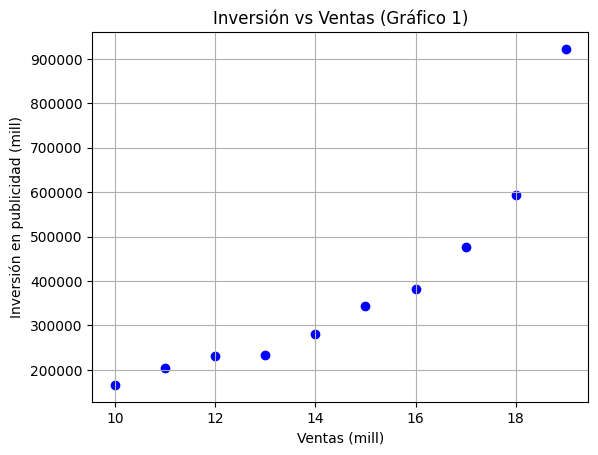

In [ ]:
plt.figure() #Este comando crea una figura vacia donda vamos a dibujas nuestro gráfico.
plt.scatter(base_medias_mill['CLASES'], #como eje X (las clases: 10, 11, ..., 19).
            base_medias_mill['MEDIAS'], #como eje Y (las medias de ventas o inversión).
            color='blue')
# ¿Por qué usamos scatter?
# Porque queremos visualizar la relación entre dos variables numéricas de forma clara.
plt.title('Inversión vs Ventas (Gráfico 1)')
plt.xlabel('Ventas (mill)')
plt.ylabel('Inversión en publicidad (mill)')
plt.grid(True) #Activa la cuadrícula de fondo, lo que ayuda a ver más fácilmente la posición de cada punto.
plt.show() #este comando siempre debe ir al final cuando usas matplotlib para asegurarte de que se renderice correctamente.

Gráfico 2: Línea con puntos + modelo de regresión lineal

<Axes: xlabel='CLASES', ylabel='MEDIAS'>

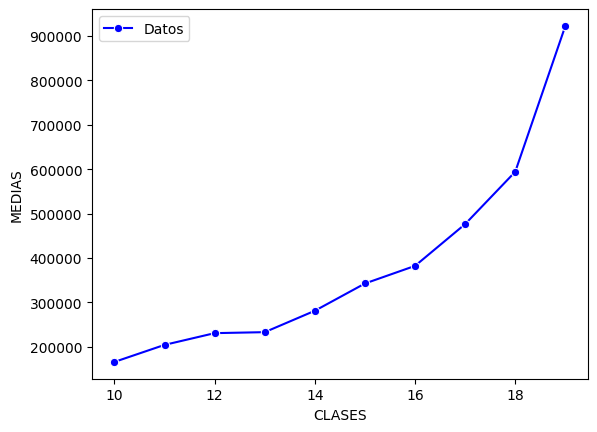

In [ ]:
plt.figure()
sns.lineplot(x='CLASES', y='MEDIAS', data=base_medias_mill, marker='o', color='blue', label='Datos')
# Línea que une los puntos, similar a type="l" en R

Calculamos los coeficientes de la recta de regresión: pendiente y ordenada al origen

In [ ]:
coef = np.polyfit(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], 1)
print(coef)

[  68285.59393939 -606755.81212121]


Creamos una función de predicción lineal a partir de esos coeficientes

In [ ]:
poly1d_fn = np.poly1d(coef)

Dibujamos la recta de regresión sobre los datos

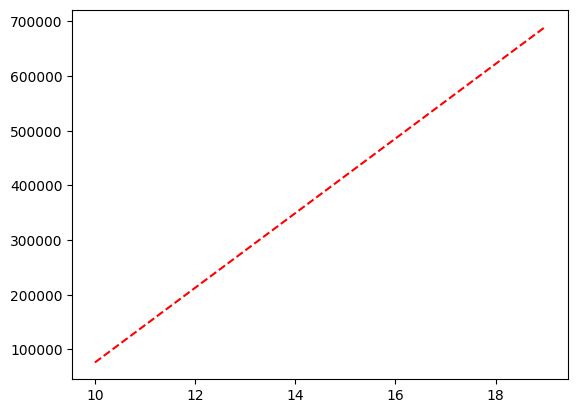

In [ ]:
plt.plot(base_medias_mill['CLASES'], poly1d_fn(base_medias_mill['CLASES']), color='red', linestyle='--', label='Regresión lineal')

Añadimos etiquetas y leyenda

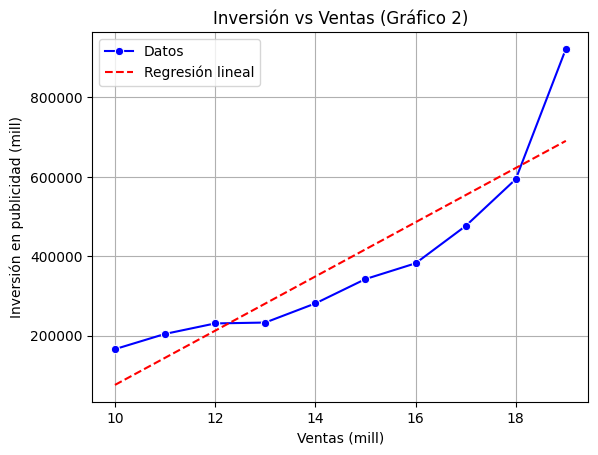

In [ ]:
plt.figure()
sns.lineplot(x='CLASES', y='MEDIAS', data=base_medias_mill, marker='o', color='blue', label='Datos')
coef = np.polyfit(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(base_medias_mill['CLASES'], poly1d_fn(base_medias_mill['CLASES']), color='red', linestyle='--', label='Regresión lineal')
plt.title('Inversión vs Ventas (Gráfico 2)')
plt.xlabel('Ventas (mill)')
plt.ylabel('Inversión en publicidad (mill)')
plt.legend()
plt.grid(True)
plt.show()

Gráfico 3: Scatter + recta sin usar seaborn (estilo más clásico)

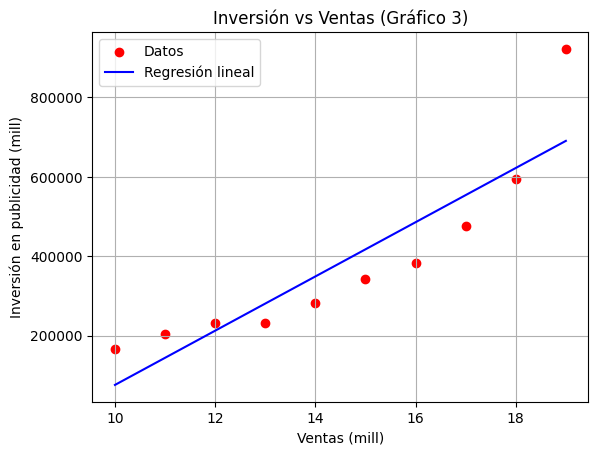

In [ ]:
plt.figure()
plt.scatter(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], color='red', label='Datos')  # puntos
plt.plot(base_medias_mill['CLASES'], poly1d_fn(base_medias_mill['CLASES']), color='blue', label='Regresión lineal')  # línea
plt.title('Inversión vs Ventas (Gráfico 3)')
plt.xlabel('Ventas (mill)')
plt.ylabel('Inversión en publicidad (mill)')
plt.legend()
plt.grid(True)
plt.show()

**Ahora quiero conseguir el mismo gráfico, pero con la ecuación que describe la regresión lineal. Además de su factor de ajuste.**

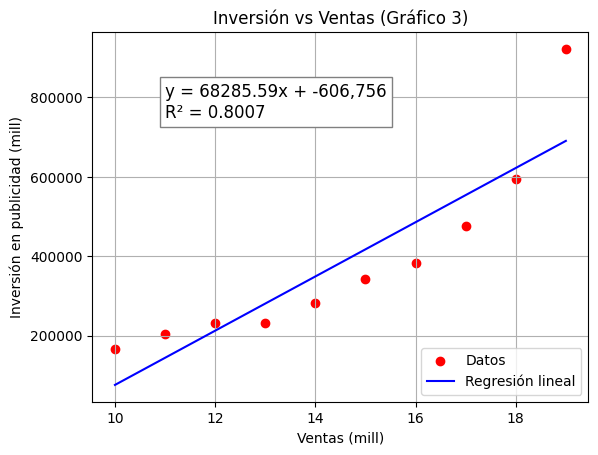

In [ ]:
# Calculamos los coeficientes de la regresión lineal (pendiente y ordenada al origen)
# polyfit: ajusta un polinomio de grado 1 (es decir, una recta) a los datos
coef = np.polyfit(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], 1)

# Creamos la función polinómica que representa la recta ajustada
# poly1d nos permite usar esta función como una función matemática evaluable
poly1d_fn = np.poly1d(coef)

# Extraemos la pendiente y el intercepto de la recta
pendiente = coef[0]
intercepto = coef[1]

# ========================================
# CÁLCULO DE R CUADRADO (R²)
# ========================================

# Obtenemos las predicciones del modelo
predicciones = poly1d_fn(base_medias_mill['CLASES'])

# Obtenemos los valores reales
valores_reales = base_medias_mill['MEDIAS']

# Calculamos la suma de residuos al cuadrado (RSS)
residuos = valores_reales - predicciones
ss_res = np.sum(residuos ** 2)

# Calculamos la suma total al cuadrado (TSS)
ss_tot = np.sum((valores_reales - np.mean(valores_reales)) ** 2)

# R² = 1 - (RSS / TSS)
r2 = 1 - (ss_res / ss_tot)

# ========================================
# CREAR STRING CON LA ECUACIÓN + R²
# ========================================

# Formato de ecuación y R² para mostrar en el gráfico
ecuacion = f"y = {pendiente:.2f}x + {intercepto:,.0f}\nR² = {r2:.4f}"

# ========================================
# GRAFICAR TODO
# ========================================

# Inicia una nueva figura
plt.figure()

# Puntos de los datos reales
plt.scatter(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], color='red', label='Datos')

# Línea de regresión ajustada
plt.plot(base_medias_mill['CLASES'], predicciones, color='blue', label='Regresión lineal')

# Título del gráfico
plt.title('Inversión vs Ventas (Gráfico 3)')

# Etiquetas de los ejes
plt.xlabel('Ventas (mill)')
plt.ylabel('Inversión en publicidad (mill)')

# Mostrar leyenda
plt.legend()

# Activar la cuadrícula
plt.grid(True)

# Mostrar la ecuación de la recta y el R² dentro del gráfico
# Puedes ajustar las coordenadas (x, y) para mover el texto a otra parte si se solapa
plt.text(11, 750000, ecuacion, fontsize=12, color='black', bbox=dict(facecolor='white', edgecolor='gray'))

# Mostrar el gráfico final
plt.show()

# Modelamiento Econométrico

1. Plantee un modelo econométrico en el cual analice la relación mencionada en la pregunta anterior. ¿Por qué tiene sentido definir un error aleatorio? ¿Qué propiedades debería tener este error?

**Importamos las librerías necesarias**

In [ ]:
import statsmodels.api as sm               # Para análisis econométrico
import statsmodels.formula.api as smf      # Para usar fórmulas al estilo R
import matplotlib.pyplot as plt            # Para graficar

Creamos un modelo de regresión lineal donde la variable dependiente es MEDIAS y la variable independiente es CLASES (como: lm(MEDIAS ~ CLASES, data) en R)

In [ ]:
modelo1 = smf.ols(formula='MEDIAS ~ CLASES', data=base_medias_mill).fit()

Mostramos un resumen estadístico completo del modelo: Incluye: coeficientes, errores estándar, t-stats, p-valores, R², etc.

In [ ]:
print("======================== MODELO CON BASE_MEDIAS_MILL ========================")
print(modelo1.summary())

======================== MODELO CON BASE_MEDIAS_MILL ========================
                            OLS Regression Results                            
Dep. Variable:                 MEDIAS   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     32.14
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           0.000471
Time:                        19:22:56   Log-Likelihood:                -129.10
No. Observations:                  10   AIC:                             262.2
Df Residuals:                       8   BIC:                             262.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Como se observa en el coeficiente de clases el cual representa los millones de inversión en publicidad es positivo, además con un p value bajo, por ende, es muy significativo.
MEDIAS=−606,756+68,286×CLASES

**MODELO ECONOMÉTRICO CON VENTAS_PUBLICIDAD_MOD2**

Creamos otro modelo de regresión lineal usando el dataset original.<br> Aquí modelamos: Ventas_Mill en función de Publicidad_Mill <br> Es equivalente a: lm(Ventas_Mill ~ Publicidad_Mill, data = ...) en R

In [ ]:
modelo2 = smf.ols(formula='Ventas_Mill ~ Publicidad_Mill', data=ventas_publicidad_mod2).fit()

Mostramos el resumen del segundo modelo (con los mismos detalles que el primero)

In [ ]:
print("\n====================== MODELO CON VENTAS_PUBLICIDAD_MOD2 ======================")
print(modelo2.summary())


====================== MODELO CON VENTAS_PUBLICIDAD_MOD2 ======================
                            OLS Regression Results                            
Dep. Variable:            Ventas_Mill   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 23 Apr 2025   Prob (F-statistic):            0.00125
Time:                        19:30:37   Log-Likelihood:                -1317.6
No. Observations:                  90   AIC:                             2639.
Df Residuals:                      88   BIC:                             2644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

**GRAFICAR REGRESIÓN DEL PRIMER MODELO**

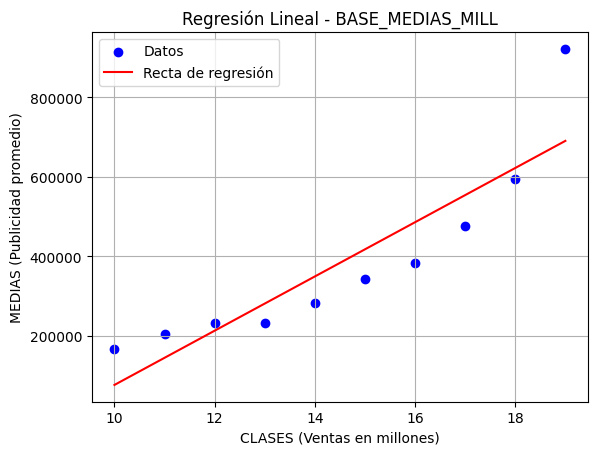

In [ ]:
# Creamos una nueva figura para graficar el primer modelo
plt.figure()

# Graficamos los puntos reales del dataset BASE_MEDIAS_MILL
# Eje X: CLASES, Eje Y: MEDIAS
plt.scatter(base_medias_mill['CLASES'], base_medias_mill['MEDIAS'], color='blue', label='Datos')

# Calculamos las predicciones generadas por el modelo1 (valores ajustados)
predicciones1 = modelo1.predict(base_medias_mill['CLASES'])

# Dibujamos la recta de regresión lineal sobre los puntos observados
plt.plot(base_medias_mill['CLASES'], predicciones1, color='red', label='Recta de regresión')

# Añadimos el título al gráfico
plt.title('Regresión Lineal - BASE_MEDIAS_MILL')

# Etiquetamos el eje X
plt.xlabel('CLASES (Ventas en millones)')

# Etiquetamos el eje Y
plt.ylabel('MEDIAS (Publicidad promedio)')

# Mostramos la leyenda (distingue puntos y línea)
plt.legend()

# Activamos la cuadrícula para facilitar la lectura
plt.grid(True)

# Mostramos el gráfico final
plt.show()

<br>

Por cada millón extra invertido en publicidad por parte de las empresas encuestadas las ventas
aumentan en promedio 68.286 millones. Tal como lo muestra la regresión planteada la variable
inversión en publicidad si es estadísticamente relevante para explicar la cantidad de venta, esto
con un nivel de certeza del 95%


---


¿Por qué tiene sentido definir un error aleatorio? <br>
<br>
Tiene sentido definir un nivel de validación de error aleatorio, debido a que, cuando
se estudian datos de corte transversal obtenidos de muestra aleatoria, es muy probable que
algunos valores se presenten variaciones significativas con respecto a la media de la población,
definir un nivel de confianza del 95% por ejemplo nos permite indicar que con un 95% de
certeza la estimación encontrada representará la población estudiada, pero existe un 5% que
puede no estar representada por la estimación.